Importing libraries and reading CSV file dataset 

In [64]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from yellowbrick.model_selection import learning_curve
from sklearn import datasets, metrics, model_selection, svm
#!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

In [65]:
import io
data = pd.read_csv("CTG.csv")

In [66]:
data.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,01-12-1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,03-05-1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,03-05-1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,03-05-1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


PLOT - Distribution of 10 class dataset classification 

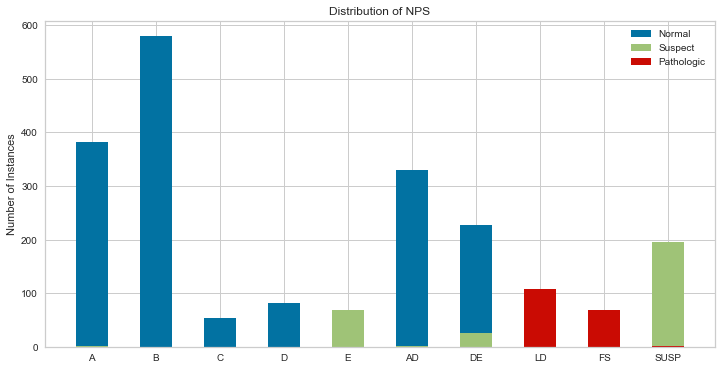

In [67]:
data_extra = data[['CLASS','NSP']]
zeroes_after = pd.DataFrame(data=np.zeros(10,),index=[1,2,3,4,5,6,7,8,9,10])
arranged = np.arange(10) 
plt.figure(figsize=(12,6))
for NSP_V in range(1,4):
    changed_norm = data_extra.loc[(data_extra['NSP']==NSP_V)].drop('NSP', axis=1)
    changed_norm = (pd.value_counts(changed_norm['CLASS'].values, sort=False)).sort_index()
    changed_norm = pd.DataFrame(data=changed_norm, index=changed_norm.index)
    changed_norm = zeroes_after.add(changed_norm,axis='index',fill_value=0) 
    changed_norm = (changed_norm.values).reshape(-1)
    if NSP_V == 1 :
        p1 = plt.bar(arranged,changed_norm, 0.50)
    elif NSP_V == 2 :
        p2 = plt.bar(arranged,changed_norm,0.50)
    elif NSP_V == 3 :
        p3 = plt.bar(arranged,changed_norm,0.50)
plt.xticks(arranged, ('A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.ylabel('Number of Instances')
plt.title('Distribution of NPS')

plt.legend((p1[0], p2[0], p3[0]), ('Normal', 'Suspect', 'Pathologic'))
plt.show()

FEATURE SELECTION 

In [68]:
#dropping unrequired columns 
data.drop(['FileName','Date', 'b','DR', 'LBE','SegFile','e','A','B','C','D','E','AD','DE','LD','FS','SUSP', 'CLASS'], inplace=True, axis=1)

In [69]:
data.dropna(axis = 0, how = 'any', inplace = True)

In [70]:
data

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2123,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2124,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2125,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 1 to 2126
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   ASTV      2126 non-null   float64
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   float64
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   float64
 9   DS        2126 non-null   float64
 10  DP        2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

CLEANING DATA 

In [72]:
#removing duplicate data points 
data = data.drop_duplicates()

In [73]:
#No null data left 
data.isnull().sum().sum()

data.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


NORMALIZATION OF DATA 

In [74]:
#normalization 
from sklearn.preprocessing import MinMaxScaler

label = 'NSP'
X = data.drop(label, axis = 1)
Y = data[label]

normalize = MinMaxScaler()

X[X.columns] = normalize.fit_transform(X[X.columns])
X.head()
print(np.shape(X), np.shape(Y))

(2112, 21) (2112,)


DATA VISUALIZATION 

1) DISTRIBUTION OF DATA IN CLASSES - BAR GRAPH 


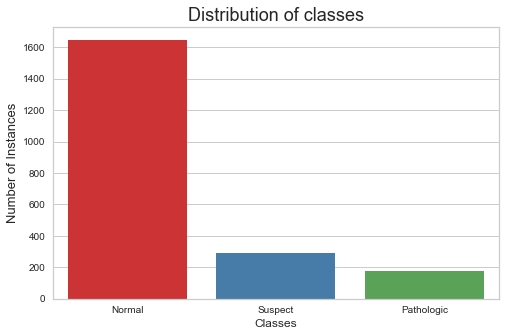

LB                                                               AC  \
      count        mean       std    min    25%    50%    75%    max   count   
NSP                                                                            
1.0  1646.0  131.998177  9.451492  106.0  125.0  132.0  138.0  160.0  1646.0   
2.0   292.0  141.650685  7.921950  120.0  137.0  143.0  147.0  159.0   292.0   
3.0   174.0  131.563218  9.380463  110.0  128.0  132.0  134.0  152.0   174.0   

               ... Variance        Tendency                                \
         mean  ...      75%    max    count      mean       std  min  25%   
NSP            ...                                                          
1.0  3.434386  ...     24.0  177.0   1646.0  0.341434  0.589737 -1.0  0.0   
2.0  0.215753  ...      4.0  116.0    292.0  0.428082  0.590561 -1.0  0.0   
3.0  0.333333  ...     80.0  269.0    174.0 -0.080460  0.692126 -1.0 -1.0   

                    
     50%  75%  max  
NSP                 
1.0  0.0  1.0  1.0  
2.0  0.0  1.0  1.0  
3.0  0.0  0.0  1.0  

[3 rows x 168 columns]

In [75]:
# DISTRIBUTION OF DATA IN CLASSES - BAR GRAPH
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(x = 'NSP', data = data, palette = 'Set1')
plt.xticks(np.arange(3), ('Normal','Suspect', 'Pathologic'))
plt.xlabel('Classes', fontsize = 12)
plt.ylabel('Number of Instances', fontsize=13)
plt.title('Distribution of classes', fontsize = 18)
plt.show()
data.groupby("NSP").describe()

PLOT OF FEATURE CORRELATION HEATMAP 

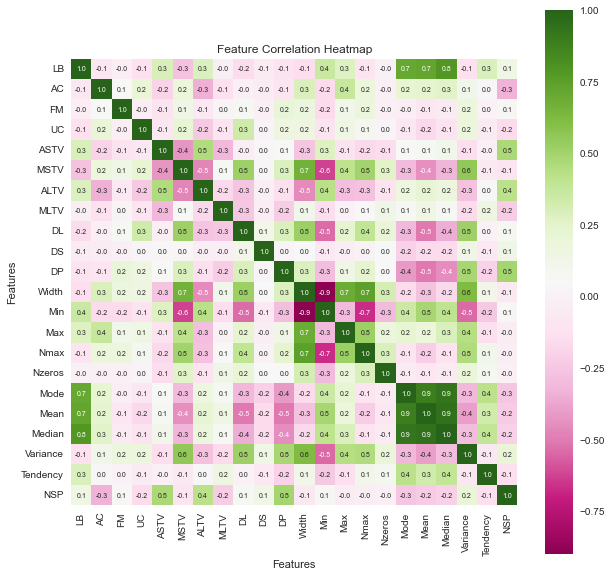

In [76]:
# plot heatmap 
correlation = data.corr()
correlation.shape
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':7}, cmap="PiYG")
plt.title('Feature Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


BOXPLOT OF FEATURES 

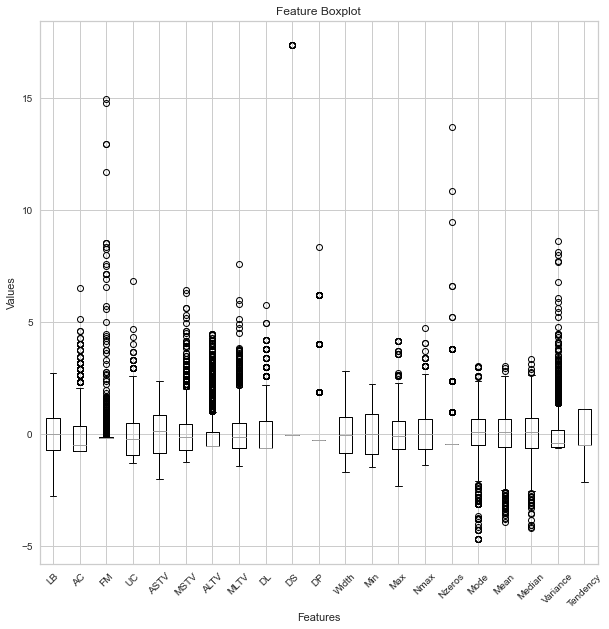

In [77]:
import sklearn 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
X1 = data.drop('NSP', axis = 1)
df_scale_X = pd.DataFrame(sklearn.preprocessing.scale(X1), columns=X1.columns)
df_scale_X.boxplot(ax=ax, rot=45)
plt.title('Feature Boxplot')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

RANDOM OVERSAMPLING

In [78]:
import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X, Y = oversample.fit_resample(X, Y)
print(np.shape(X), np.shape(Y))

(3584, 21) (3584,)


In [79]:
from sklearn.model_selection import train_test_split, KFold , StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

TRAIN TEST SPLIT 

In [80]:

dataframe = data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)#, stratify=Y)


IMPLEMENTING MODELS WITH TEST DATA BEFORE PERFORMING *PCA*...

K FOLD CROSS VALIDATION

In [81]:
#K fold cross validation 

kf = KFold(n_splits=3, shuffle=True, random_state=786)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
for train, test in kf.split(x_train):
  print(x_train[train].shape, y_train[train].shape, x_train[test].shape, y_train[test].shape)

(1672, 21) (1672,) (836, 21) (836,)
(1672, 21) (1672,) (836, 21) (836,)
(1672, 21) (1672,) (836, 21) (836,)


In [82]:
# Test Data...
accuracy_models = []
precision_models = []
recall_models = []
f1score_models = []

In [83]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

def print_confusion_matrix(model,x_test,y_test): 
  y_pred = model.predict(x_test)
  conf = confusion_matrix(y_test,np.round(y_pred))
  label = ["N","S","P"]
  sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
  plt.show()

In [84]:
def print_metrics(model,x_test,y_test): 
  y_pred_lr = model.predict(x_test)
  clf_report = classification_report(y_test, y_pred_lr,target_names=label, output_dict=True)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
  precision=precision_score(y_test, y_pred_lr,average='weighted')*100
  print("Precision: ", precision)
  recall=recall_score(y_test, y_pred_lr,average='weighted')*100
  print("Recall: ", recall)
  accuracy=accuracy_score(y_test, y_pred_lr)*100
  print("Accuracy: ", accuracy)
  f1 = f1_score(y_test,y_pred_lr,average='weighted')*100
  print("F1 score: ", f1)
  return accuracy, precision, recall, f1, clf_report

MODELS

LOGISTIC REGRESSION

In [85]:
def GridSearchCV_lr(x_train, y_train): 
  pipe_line = Pipeline([('classifier1' , LogisticRegression(random_state = 0))])
  param_grid = [
    {'classifier1' : [LogisticRegression(solver = 'saga', max_iter = 5000, random_state = 0)],
     'classifier1__penalty' : ['l1', 'l2'],
    'classifier1__C' : np.logspace(-4, 4, 10),
    'classifier1__multi_class' : ['ovr', 'multinomial']},
    {'classifier1' : [LogisticRegression(max_iter = 3000, random_state = 0)],
     'classifier1__penalty' : ['l2'],
    'classifier1__C' : np.logspace(-4, 4, 10),
    'classifier1__multi_class' : ['ovr', 'multinomial'], 
     'classifier1__solver' : ['sag', 'newton-cg']}
  ]
  gs = GridSearchCV(estimator=pipe_line,param_grid=param_grid)
  gs.get_params().keys()
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_params_

print(GridSearchCV_lr(x_train, y_train))

{'classifier1': LogisticRegression(C=166.81005372000558, max_iter=5000,
                   multi_class='multinomial', random_state=0, solver='saga'), 'classifier1__C': 166.81005372000558, 'classifier1__multi_class': 'multinomial', 'classifier1__penalty': 'l2'}


In [86]:
model_lr = LogisticRegression(C=2.782559402207126, max_iter=5000,multi_class='multinomial', penalty='l1', random_state=0,solver='saga')
model_lr.fit(x_train,y_train)

LogisticRegression(C=2.782559402207126, max_iter=5000,
                   multi_class='multinomial', penalty='l1', random_state=0,
                   solver='saga')

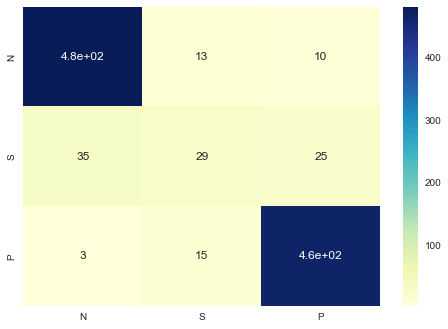

In [87]:
print_confusion_matrix(model_lr,x_test,y_test)

Precision:  89.36514569241076
Recall:  90.61338289962825
Accuracy:  90.61338289962825
F1 score:  89.80127039088211


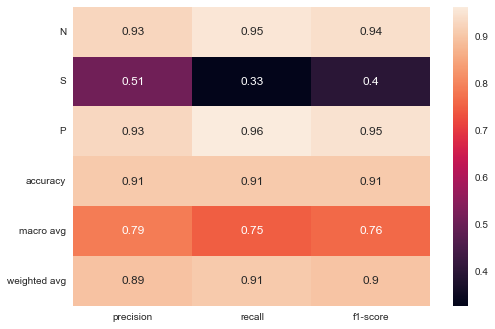

In [88]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_lr,x_test,y_test)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

In [89]:
# classification report
print(clf_report)

{'N': {'precision': 0.9267822736030829, 'recall': 0.9543650793650794, 'f1-score': 0.9403714565004888, 'support': 504}, 'S': {'precision': 0.5087719298245614, 'recall': 0.3258426966292135, 'f1-score': 0.3972602739726028, 'support': 89}, 'P': {'precision': 0.93, 'recall': 0.9627329192546584, 'f1-score': 0.9460834181078333, 'support': 483}, 'accuracy': 0.9061338289962825, 'macro avg': {'precision': 0.7885180678092149, 'recall': 0.747646898416317, 'f1-score': 0.7612383828603083, 'support': 1076}, 'weighted avg': {'precision': 0.8936514569241076, 'recall': 0.9061338289962825, 'f1-score': 0.8980127039088212, 'support': 1076}}


K NEAREST NEIGHBORS

In [90]:
def GridSearchCV_knn(x_train, y_train): 
  classifier = KNeighborsClassifier()
  param_grid = {
     'weights' : ['uniform', 'distance'], 
     'n_neighbors' : range(1, 30), 
     'metric' : ['euclidean', 'manhattan'], 
     'algorithm' : ['ball_tree', 'kd_tree'], 
  }
  gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_

In [91]:
print(GridSearchCV_knn(x_train, y_train))

KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=3,
                     weights='distance')


In [92]:
model_knn = KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=3, weights='distance')
model_knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=3,
                     weights='distance')

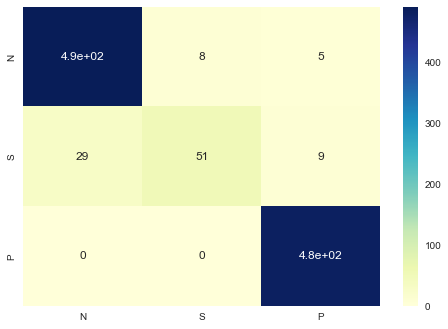

In [93]:
print_confusion_matrix(model_knn,x_test,y_test)

Precision:  95.00175439398897
Recall:  95.26022304832715
Accuracy:  95.26022304832715
F1 score:  94.86672517080278


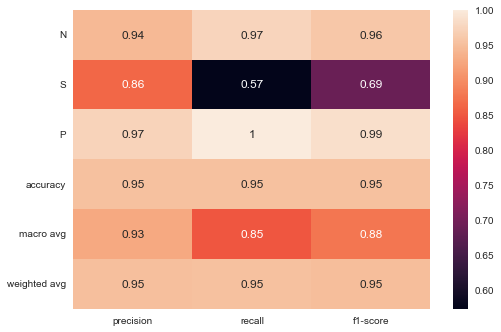

In [94]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_knn,x_test,y_test)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

In [95]:
print(clf_report)

{'N': {'precision': 0.9442307692307692, 'recall': 0.9742063492063492, 'f1-score': 0.9589843750000001, 'support': 504}, 'S': {'precision': 0.864406779661017, 'recall': 0.5730337078651685, 'f1-score': 0.6891891891891891, 'support': 89}, 'P': {'precision': 0.971830985915493, 'recall': 1.0, 'f1-score': 0.9857142857142858, 'support': 483}, 'accuracy': 0.9526022304832714, 'macro avg': {'precision': 0.9268228449357597, 'recall': 0.8490800190238392, 'f1-score': 0.8779626166344917, 'support': 1076}, 'weighted avg': {'precision': 0.9500175439398897, 'recall': 0.9526022304832714, 'f1-score': 0.9486672517080278, 'support': 1076}}


DECISION TREE

In [96]:
def GridSearchCV_dt(x_train, y_train): 
  classifier = DecisionTreeClassifier()
  param_grid = {
     "max_depth": range(5, 30),
     "criterion" : ["gini", "entropy"], 
     "splitter" : ['best', 'random'], 
     "max_features" : ['auto', 'sqrt', 'log2']
  }
  gs = GridSearchCV(estimator = classifier, param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_

print(GridSearchCV_dt(x_train, y_train))

DecisionTreeClassifier(criterion='entropy', max_depth=23, max_features='auto')


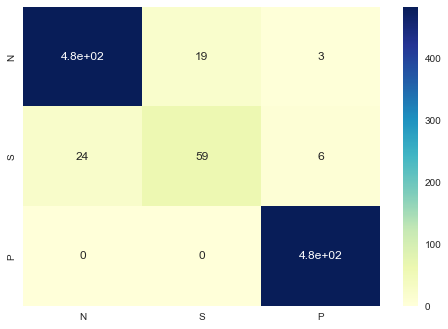

In [97]:
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=21, max_features='auto')
model_dt.fit(x_train,y_train)

print_confusion_matrix(model_dt,x_test,y_test)

Precision:  94.94237998391574
Recall:  95.16728624535315
Accuracy:  95.16728624535315
F1 score:  95.02540060974945


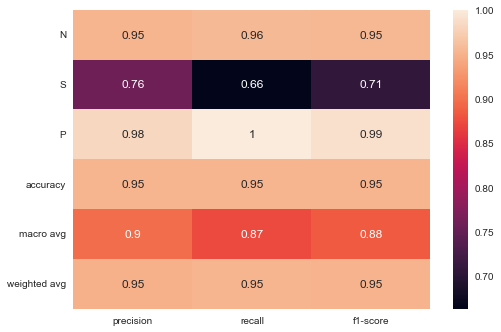

In [98]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_dt,x_test,y_test)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

In [99]:
print(clf_report)

{'N': {'precision': 0.9525691699604744, 'recall': 0.9563492063492064, 'f1-score': 0.9544554455445546, 'support': 504}, 'S': {'precision': 0.7564102564102564, 'recall': 0.6629213483146067, 'f1-score': 0.7065868263473053, 'support': 89}, 'P': {'precision': 0.9817073170731707, 'recall': 1.0, 'f1-score': 0.9907692307692307, 'support': 483}, 'accuracy': 0.9516728624535316, 'macro avg': {'precision': 0.8968955811479672, 'recall': 0.8730901848879377, 'f1-score': 0.8839371675536968, 'support': 1076}, 'weighted avg': {'precision': 0.9494237998391574, 'recall': 0.9516728624535316, 'f1-score': 0.9502540060974946, 'support': 1076}}


BOOSTING (AdaBoost)

In [100]:
from random import seed
from sklearn.ensemble import AdaBoostClassifier
def GridSearchCV_ada(x_train, y_train): 
  classifier = AdaBoostClassifier(random_state = seed(7))
  param_grid = {
    'n_estimators' : [10,30,50,100,125,135,150,160, 200, 400, 500, 1000], 
    "learning_rate" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
    'algorithm' : ['SAMME', 'SAMME.R']
  }
  gs = GridSearchCV(estimator = classifier, param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_

print(GridSearchCV_ada(x_train,y_train))

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=500)


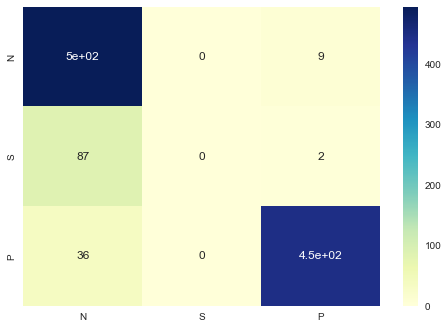

In [101]:
model_ada = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=150)
model_ada.fit(x_train,y_train)

print_confusion_matrix(model_ada,x_test,y_test)

Precision:  81.32796316980733
Recall:  87.54646840148699
Accuracy:  87.54646840148699
F1 score:  83.97598016170782


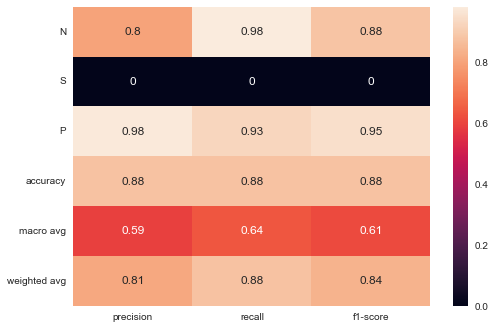

In [102]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_ada,x_test,y_test)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

In [103]:
print(clf_report)

{'N': {'precision': 0.8009708737864077, 'recall': 0.9821428571428571, 'f1-score': 0.8823529411764706, 'support': 504}, 'S': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 89}, 'P': {'precision': 0.9759825327510917, 'recall': 0.9254658385093167, 'f1-score': 0.9500531349628055, 'support': 483}, 'accuracy': 0.8754646840148699, 'macro avg': {'precision': 0.5923178021791665, 'recall': 0.6358695652173912, 'f1-score': 0.6108020253797587, 'support': 1076}, 'weighted avg': {'precision': 0.8132796316980733, 'recall': 0.8754646840148699, 'f1-score': 0.8397598016170783, 'support': 1076}}


RANDOM FOREST

In [104]:
def GridSearchCV_rf(x_train, y_train): 
  classifier = RandomForestClassifier(random_state = 7)
  param_grid = {
      'n_estimators': [10,30,50,100,125,135,150,160, 200, 400], 
      'max_features': ['auto', 'sqrt', 'log2'], 
      "criterion" : ["gini", "entropy"], 
  }
  gs = GridSearchCV(estimator = classifier, param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_

print(GridSearchCV_rf(x_train, y_train))

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=125, random_state=7)


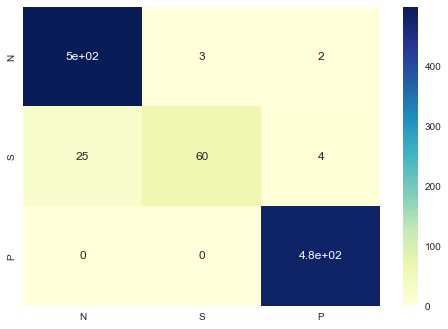

In [105]:
model_rf = RandomForestClassifier(criterion='entropy', max_features='auto',n_estimators=150, random_state=7)
model_rf.fit(x_train, y_train)

print_confusion_matrix(model_rf,x_test,y_test)

Precision:  96.82060621441349
Recall:  96.84014869888475
Accuracy:  96.84014869888475
F1 score:  96.6146380303931


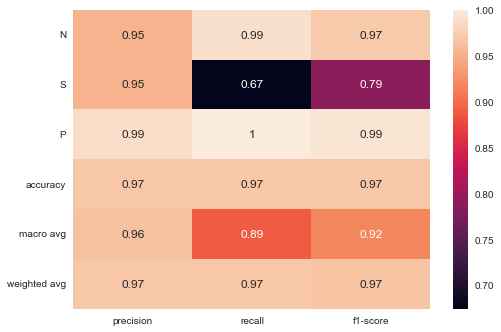

In [106]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_rf,x_test,y_test)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

In [107]:
print(clf_report)

{'N': {'precision': 0.9522900763358778, 'recall': 0.9900793650793651, 'f1-score': 0.9708171206225682, 'support': 504}, 'S': {'precision': 0.9523809523809523, 'recall': 0.6741573033707865, 'f1-score': 0.7894736842105263, 'support': 89}, 'P': {'precision': 0.9877300613496932, 'recall': 1.0, 'f1-score': 0.9938271604938271, 'support': 483}, 'accuracy': 0.9684014869888475, 'macro avg': {'precision': 0.9641336966888412, 'recall': 0.8880788894833839, 'f1-score': 0.9180393217756405, 'support': 1076}, 'weighted avg': {'precision': 0.9682060621441348, 'recall': 0.9684014869888475, 'f1-score': 0.966146380303931, 'support': 1076}}


NAIVE BAYES

In [108]:
def GridSearchCV_nb(x_train, y_train): 
  classifier = GaussianNB()
  param_grid = {'var_smoothing' : np.logspace(5, -10, num = 1000)}
  gs = GridSearchCV(estimator = classifier, param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_

print(GridSearchCV_nb(x_train, y_train))

GaussianNB(var_smoothing=140.32890847858732)


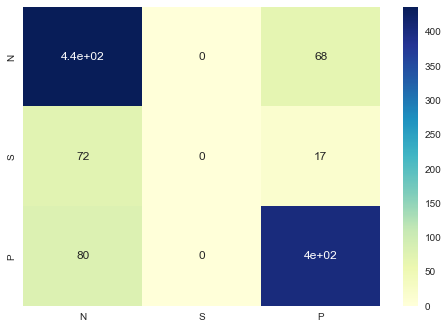

In [109]:
model_nb = GaussianNB(var_smoothing=135.5601785329369)
model_nb.fit(x_train,y_train)

print_confusion_matrix(model_nb,x_test,y_test)

Precision:  71.80159733769796
Recall:  77.97397769516728
Accuracy:  77.97397769516728
F1 score:  74.66415968726467


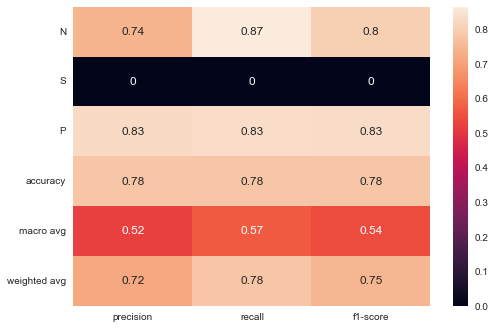

In [110]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_nb,x_test,y_test)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

In [111]:
print(clf_report)

{'N': {'precision': 0.7414965986394558, 'recall': 0.8650793650793651, 'f1-score': 0.7985347985347985, 'support': 504}, 'S': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 89}, 'P': {'precision': 0.8258196721311475, 'recall': 0.8343685300207039, 'f1-score': 0.8300720906282183, 'support': 483}, 'accuracy': 0.7797397769516728, 'macro avg': {'precision': 0.5224387569235344, 'recall': 0.566482631700023, 'f1-score': 0.542868963054339, 'support': 1076}, 'weighted avg': {'precision': 0.7180159733769795, 'recall': 0.7797397769516728, 'f1-score': 0.7466415968726468, 'support': 1076}}


BAGGING Classifier

In [112]:
from sklearn.ensemble import BaggingClassifier
def GridSearchCV_bagging(x_train, y_train): 
  classifier = BaggingClassifier(random_state = seed(7), bootstrap = True)
  param_grid = {
    'n_estimators' : [10,30,50,100,125,135,150,160, 200, 400, 500, 1000], 
    'max_features' : [1, 2, 3, 4, 5, 10], 
    'bootstrap_features' : [True, False], 
    'oob_score' : [True, False]
  }
  gs = GridSearchCV(estimator = classifier, param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_

print(GridSearchCV_bagging(x_train,y_train))

BaggingClassifier(max_features=10, n_estimators=100)


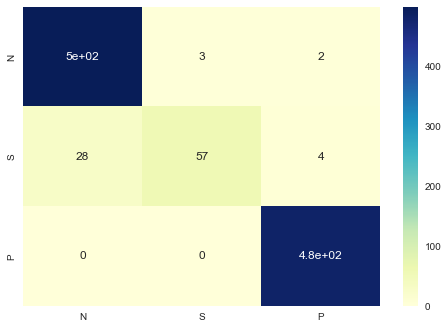

In [113]:
model_bagging = BaggingClassifier(max_features=10, n_estimators=125)
model_bagging.fit(x_train,y_train)

print_confusion_matrix(model_bagging,x_test,y_test)

Precision:  96.54699173021383
Recall:  96.56133828996283
Accuracy:  96.56133828996283
F1 score:  96.28072188511298


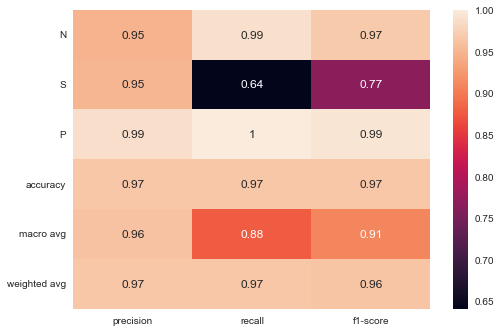

In [114]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_bagging,x_test,y_test)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

In [115]:
print(clf_report)

{'N': {'precision': 0.9468690702087287, 'recall': 0.9900793650793651, 'f1-score': 0.967992240543162, 'support': 504}, 'S': {'precision': 0.95, 'recall': 0.6404494382022472, 'f1-score': 0.7651006711409395, 'support': 89}, 'P': {'precision': 0.9877300613496932, 'recall': 1.0, 'f1-score': 0.9938271604938271, 'support': 483}, 'accuracy': 0.9656133828996283, 'macro avg': {'precision': 0.9615330438528074, 'recall': 0.8768429344272041, 'f1-score': 0.908973357392643, 'support': 1076}, 'weighted avg': {'precision': 0.9654699173021384, 'recall': 0.9656133828996283, 'f1-score': 0.9628072188511299, 'support': 1076}}


MULTI-LAYER PERCEPTRON

In [116]:
from sklearn.neural_network import MLPClassifier
def GridSearchCV_mlp(x_train, y_train): 
  classifier = MLPClassifier(random_state=1, max_iter=300)
  param_grid = {
      'activation' : ['identity', 'relu', 'logistic', 'tanh'], 
      'solver' : ['lbfgs', 'sgd', 'adam'], 
      'learning_rate' : ['constant', 'invscaling', 'adaptive']
  }
  gs = GridSearchCV(estimator = classifier, param_grid=param_grid, cv = 3,  n_jobs  = -1) 
  gs_fit = gs.fit(x_train, y_train)
  return gs_fit.best_estimator_

print(GridSearchCV_mlp(x_train,y_train))

MLPClassifier(activation='tanh', max_iter=300, random_state=1, solver='lbfgs')


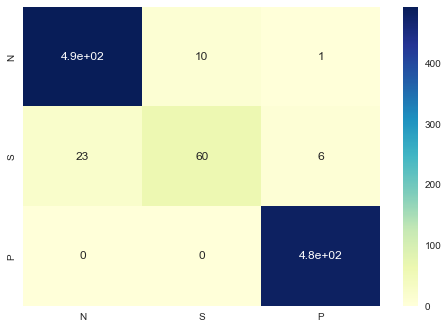

In [117]:
model_mlp = MLPClassifier(activation='tanh', max_iter=300, random_state=1, solver='lbfgs')
model_mlp.fit(x_train,y_train)

print_confusion_matrix(model_mlp,x_test,y_test)

Precision:  96.0892749076807
Recall:  96.28252788104089
Accuracy:  96.28252788104089
F1 score:  96.08689509078715


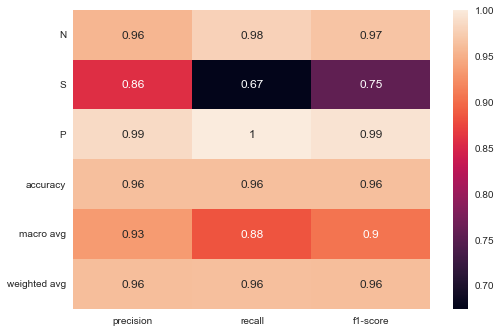

In [118]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_mlp,x_test,y_test)
accuracy_models.append(accuracy)
precision_models.append(precision)
recall_models.append(recall)
f1score_models.append(f1)

In [119]:
print(clf_report)

{'N': {'precision': 0.9554263565891473, 'recall': 0.9781746031746031, 'f1-score': 0.9666666666666667, 'support': 504}, 'S': {'precision': 0.8571428571428571, 'recall': 0.6741573033707865, 'f1-score': 0.7547169811320754, 'support': 89}, 'P': {'precision': 0.9857142857142858, 'recall': 1.0, 'f1-score': 0.9928057553956835, 'support': 483}, 'accuracy': 0.9628252788104089, 'macro avg': {'precision': 0.9327611664820967, 'recall': 0.8841106355151299, 'f1-score': 0.9047298010648085, 'support': 1076}, 'weighted avg': {'precision': 0.9608927490768071, 'recall': 0.9628252788104089, 'f1-score': 0.9608689509078715, 'support': 1076}}


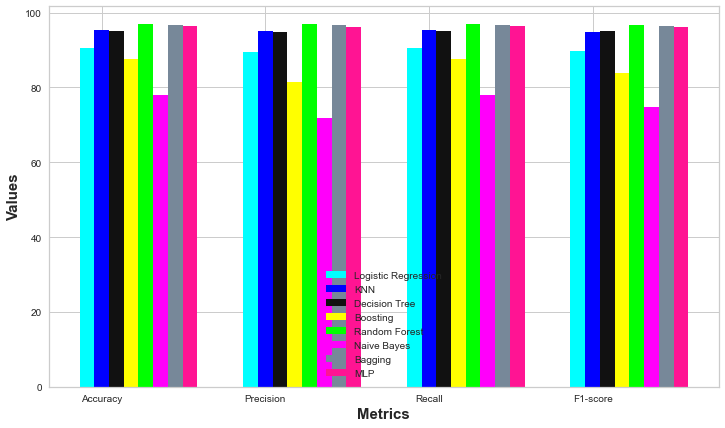

In [120]:
# set width of bar
barWidth = 0.09
fig = plt.subplots(figsize =(12,7))
 
# set height of bar
LR_arr = [accuracy_models[0],precision_models[0],recall_models[0],f1score_models[0]]
KNN_arr = [accuracy_models[1],precision_models[1],recall_models[1],f1score_models[1]]
DT_arr = [accuracy_models[2],precision_models[2],recall_models[2],f1score_models[2]]
Boosting_arr= [accuracy_models[3],precision_models[3],recall_models[3],f1score_models[3]]
RF_arr = [accuracy_models[4],precision_models[4],recall_models[4],f1score_models[4]]
NB_arr = [accuracy_models[5],precision_models[5],recall_models[5],f1score_models[5]]
BAGGING_arr = [accuracy_models[6],precision_models[6],recall_models[6],f1score_models[6]]
MLP_arr = [accuracy_models[7],precision_models[7],recall_models[7],f1score_models[7]]

# Set position of bar on X axis
br1 = np.arange(len(LR_arr))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]

# Make the plot
plt.bar(br1, LR_arr, color ='#00FFFF', width = barWidth,label ='Logistic Regression')
plt.bar(br2, KNN_arr, color ='blue', width = barWidth, label ='KNN')
plt.bar(br3, DT_arr, color ='k', width = barWidth, label ='Decision Tree')
plt.bar(br4, Boosting_arr, color ='yellow', width = barWidth, label ='Boosting')
plt.bar(br5, RF_arr, color ='#00FF00', width = barWidth, label ='Random Forest')
plt.bar(br6, NB_arr, color ='#FF00FA', width = barWidth, label ='Naive Bayes')
plt.bar(br7, BAGGING_arr, color ='lightslategrey', width = barWidth, label ='Bagging')
plt.bar(br8, MLP_arr, color ='deeppink', width = barWidth, label ='MLP')

# Adding Xticks
plt.xlabel('Metrics', fontweight ='bold', fontsize = 15)
plt.ylabel('Values', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(LR_arr))],
        ['Accuracy', 'Precision', 'Recall', 'F1-score'])
 
plt.legend()
plt.show()

PERFORMING PCA

In [121]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_


IMPLEMENTING MODELS AFTER PERFORMING *PCA*...

In [122]:
# Train Data...
accuracy_models2 = []
precision_models2 = []
recall_models2 = []
f1score_models2 = []

LOGISTIC REGRESSION


In [123]:
print(GridSearchCV_lr(x_train,y_train))

{'classifier1': LogisticRegression(C=0.000774263682681127, max_iter=5000, multi_class='ovr',
                   random_state=0, solver='saga'), 'classifier1__C': 0.000774263682681127, 'classifier1__multi_class': 'ovr', 'classifier1__penalty': 'l2'}


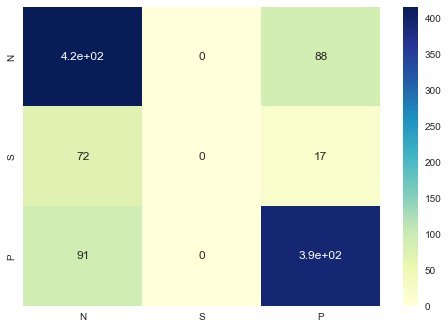

In [124]:
model_lr = LogisticRegression(C=0.000774263682681127, max_iter=5000, multi_class='multinomial', random_state=0, solver='saga')
model_lr.fit(x_train,y_train)

print_confusion_matrix(model_lr,x_test,y_test)

Precision:  69.05871153496086
Recall:  75.09293680297398
Accuracy:  75.09293680297398
F1 score:  71.8950869641331


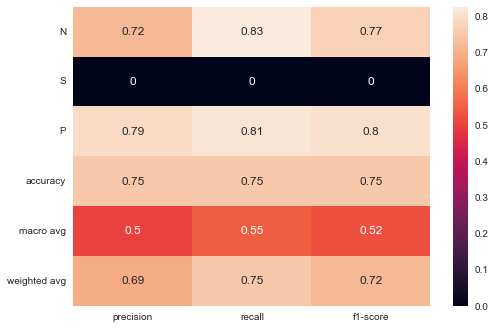

In [125]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_lr,x_test,y_test)
accuracy_models2.append(accuracy)
precision_models2.append(precision)
recall_models2.append(recall)
f1score_models2.append(f1)

In [126]:
print(clf_report)

{'N': {'precision': 0.7184801381692574, 'recall': 0.8253968253968254, 'f1-score': 0.7682363804247461, 'support': 504}, 'S': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 89}, 'P': {'precision': 0.7887323943661971, 'recall': 0.8115942028985508, 'f1-score': 0.8, 'support': 483}, 'accuracy': 0.7509293680297398, 'macro avg': {'precision': 0.5024041775118181, 'recall': 0.5456636760984587, 'f1-score': 0.5227454601415821, 'support': 1076}, 'weighted avg': {'precision': 0.6905871153496087, 'recall': 0.7509293680297398, 'f1-score': 0.7189508696413309, 'support': 1076}}


K NEAREST NEIGHBORS...

In [127]:
print(GridSearchCV_knn(x_train, y_train))

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=2)


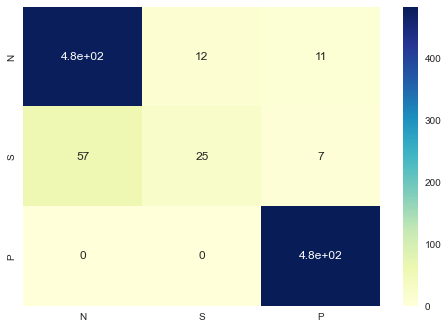

In [128]:
model_knn = KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=2)
model_knn.fit(x_train,y_train)

print_confusion_matrix(model_knn,x_test,y_test)

Precision:  90.74201414546775
Recall:  91.91449814126395
Accuracy:  91.91449814126395
F1 score:  90.59361308600859


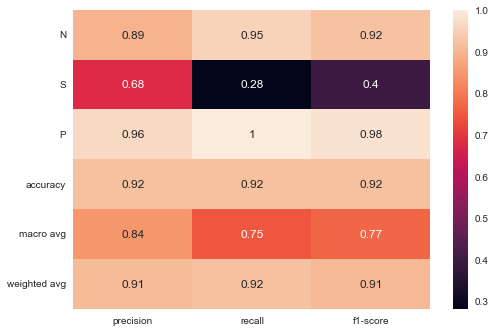

In [129]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_knn,x_test,y_test)
accuracy_models2.append(accuracy)
precision_models2.append(precision)
recall_models2.append(recall)
f1score_models2.append(f1)

In [130]:
print(clf_report)

{'N': {'precision': 0.8940520446096655, 'recall': 0.9543650793650794, 'f1-score': 0.9232245681381958, 'support': 504}, 'S': {'precision': 0.6756756756756757, 'recall': 0.2808988764044944, 'f1-score': 0.39682539682539686, 'support': 89}, 'P': {'precision': 0.9640718562874252, 'recall': 1.0, 'f1-score': 0.9817073170731708, 'support': 483}, 'accuracy': 0.9191449814126395, 'macro avg': {'precision': 0.8445998588575887, 'recall': 0.7450879852565246, 'f1-score': 0.7672524273455879, 'support': 1076}, 'weighted avg': {'precision': 0.9074201414546775, 'recall': 0.9191449814126395, 'f1-score': 0.9059361308600858, 'support': 1076}}


DECISION TREE

In [131]:
print(GridSearchCV_dt(x_train,y_train))

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features='sqrt')


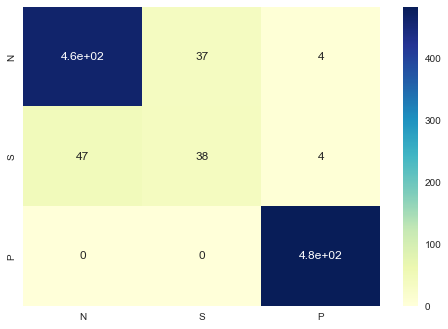

In [132]:
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt')
model_dt.fit(x_train, y_train)

print_confusion_matrix(model_dt, x_test, y_test)

Precision:  90.8714331544594
Recall:  91.44981412639405
Accuracy:  91.44981412639405
F1 score:  91.12798435669663


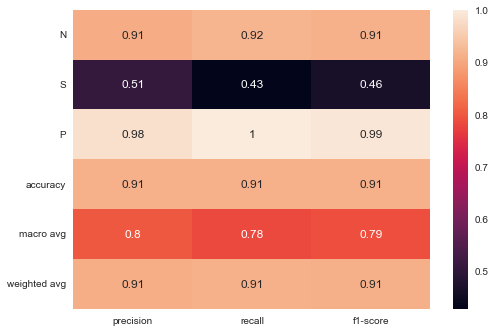

In [133]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_dt,x_test,y_test)
accuracy_models2.append(accuracy)
precision_models2.append(precision)
recall_models2.append(recall)
f1score_models2.append(f1)

In [134]:
print(clf_report)

{'N': {'precision': 0.907843137254902, 'recall': 0.9186507936507936, 'f1-score': 0.9132149901380671, 'support': 504}, 'S': {'precision': 0.5066666666666667, 'recall': 0.42696629213483145, 'f1-score': 0.46341463414634143, 'support': 89}, 'P': {'precision': 0.9837067209775967, 'recall': 1.0, 'f1-score': 0.9917864476386037, 'support': 483}, 'accuracy': 0.9144981412639405, 'macro avg': {'precision': 0.7994055082997219, 'recall': 0.7818723619285417, 'f1-score': 0.7894720239743375, 'support': 1076}, 'weighted avg': {'precision': 0.908714331544594, 'recall': 0.9144981412639405, 'f1-score': 0.9112798435669663, 'support': 1076}}


BOOSTING (AdaBoost)

In [135]:
print(GridSearchCV_ada(x_train,y_train))

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=200)


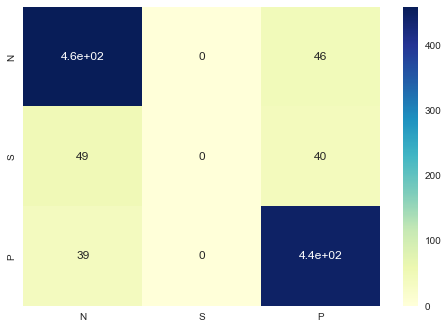

In [136]:
model_ada = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=200)
model_ada.fit(x_train,y_train)

print_confusion_matrix(model_ada,x_test,y_test)

Precision:  76.89550612114967
Recall:  83.82899628252788
Accuracy:  83.82899628252788
F1 score:  80.21187756195481


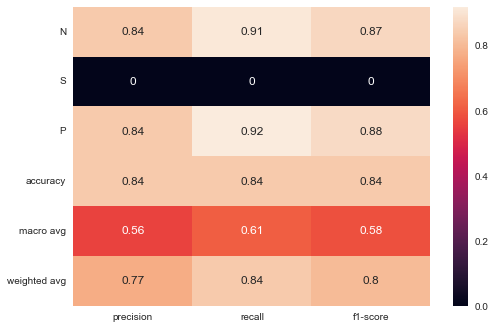

In [137]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_ada,x_test,y_test)
accuracy_models2.append(accuracy)
precision_models2.append(precision)
recall_models2.append(recall)
f1score_models2.append(f1)

In [138]:
print(clf_report)

{'N': {'precision': 0.8388278388278388, 'recall': 0.9087301587301587, 'f1-score': 0.8723809523809524, 'support': 504}, 'S': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 89}, 'P': {'precision': 0.8377358490566038, 'recall': 0.9192546583850931, 'f1-score': 0.876604146100691, 'support': 483}, 'accuracy': 0.8382899628252788, 'macro avg': {'precision': 0.5588545626281475, 'recall': 0.6093282723717506, 'f1-score': 0.5829950328272145, 'support': 1076}, 'weighted avg': {'precision': 0.7689550612114966, 'recall': 0.8382899628252788, 'f1-score': 0.8021187756195481, 'support': 1076}}


RANDOM FOREST

In [139]:
print(GridSearchCV_rf(x_train,y_train))

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=150, random_state=7)


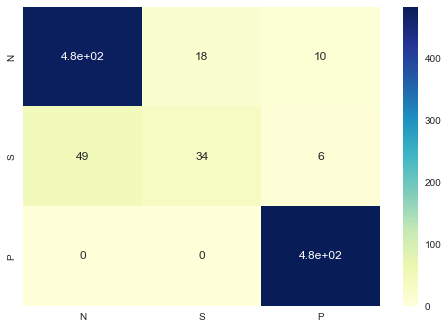

In [140]:
model_rf = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=400, random_state=7)
model_rf.fit(x_train,y_train)

print_confusion_matrix(model_rf,x_test,y_test)

Precision:  91.32577451156243
Recall:  92.28624535315984
Accuracy:  92.28624535315984
F1 score:  91.48123107188627


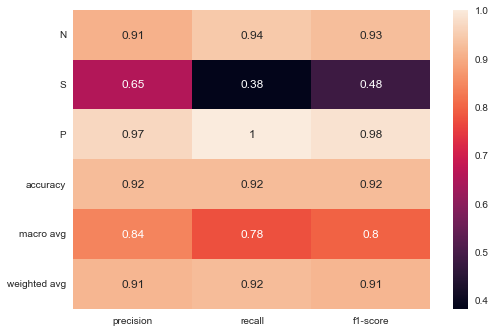

In [141]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_rf,x_test,y_test)
accuracy_models2.append(accuracy)
precision_models2.append(precision)
recall_models2.append(recall)
f1score_models2.append(f1)

In [142]:
print(clf_report)

{'N': {'precision': 0.9066666666666666, 'recall': 0.9444444444444444, 'f1-score': 0.9251700680272109, 'support': 504}, 'S': {'precision': 0.6538461538461539, 'recall': 0.38202247191011235, 'f1-score': 0.4822695035460993, 'support': 89}, 'P': {'precision': 0.9679358717434869, 'recall': 1.0, 'f1-score': 0.9837067209775967, 'support': 483}, 'accuracy': 0.9228624535315985, 'macro avg': {'precision': 0.8428162307521024, 'recall': 0.7754889721181856, 'f1-score': 0.7970487641836357, 'support': 1076}, 'weighted avg': {'precision': 0.9132577451156243, 'recall': 0.9228624535315985, 'f1-score': 0.9148123107188627, 'support': 1076}}


NAIVE BAYES

In [143]:
print(GridSearchCV_nb(x_train,y_train))

GaussianNB(var_smoothing=0.15459277364194784)


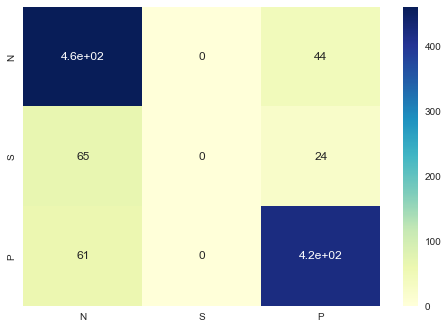

In [144]:
model_nb = GaussianNB(var_smoothing=0.34240061379714254)
model_nb.fit(x_train,y_train)

print_confusion_matrix(model_nb,x_test,y_test)

Precision:  75.42777210862776
Recall:  81.97026022304833
Accuracy:  81.97026022304833
F1 score:  78.47198180202811


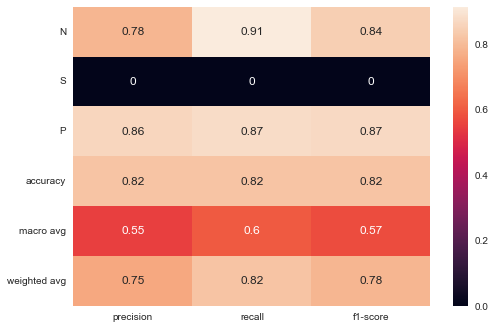

In [145]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_nb,x_test,y_test)
accuracy_models2.append(accuracy)
precision_models2.append(precision)
recall_models2.append(recall)
f1score_models2.append(f1)

In [146]:
print(clf_report)

{'N': {'precision': 0.7849829351535836, 'recall': 0.9126984126984127, 'f1-score': 0.8440366972477065, 'support': 504}, 'S': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 89}, 'P': {'precision': 0.8612244897959184, 'recall': 0.8737060041407867, 'f1-score': 0.8674203494347379, 'support': 483}, 'accuracy': 0.8197026022304833, 'macro avg': {'precision': 0.5487358083165007, 'recall': 0.5954681389463997, 'f1-score': 0.5704856822274814, 'support': 1076}, 'weighted avg': {'precision': 0.7542777210862777, 'recall': 0.8197026022304833, 'f1-score': 0.7847198180202811, 'support': 1076}}


BAGGING Classifier

In [147]:
print(GridSearchCV_bagging(x_train, y_train))

BaggingClassifier(bootstrap_features=True, max_features=2, n_estimators=150)


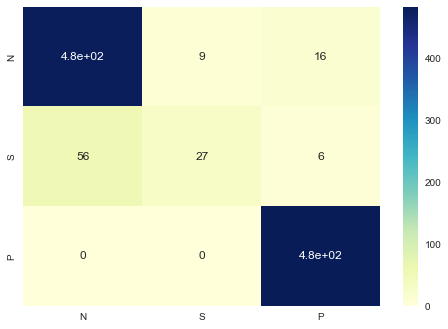

In [148]:
model_bagging = BaggingClassifier(bootstrap_features=True, max_features=2, n_estimators=150)
model_bagging.fit(x_train,y_train)

print_confusion_matrix(model_bagging,x_test,y_test)

Precision:  91.07372450322195
Recall:  91.91449814126395
Accuracy:  91.91449814126395
F1 score:  90.65067961963301


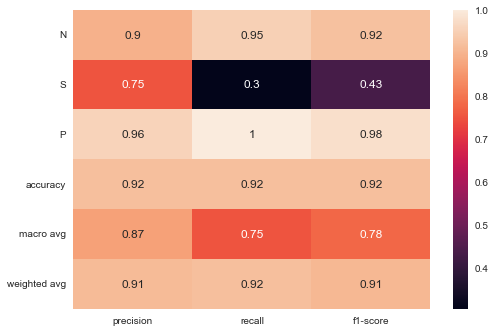

In [149]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_bagging,x_test,y_test)
accuracy_models2.append(accuracy)
precision_models2.append(precision)
recall_models2.append(recall)
f1score_models2.append(f1)

In [150]:
print(clf_report)

{'N': {'precision': 0.8953271028037383, 'recall': 0.9503968253968254, 'f1-score': 0.9220404234841194, 'support': 504}, 'S': {'precision': 0.75, 'recall': 0.30337078651685395, 'f1-score': 0.432, 'support': 89}, 'P': {'precision': 0.9564356435643564, 'recall': 1.0, 'f1-score': 0.9777327935222672, 'support': 483}, 'accuracy': 0.9191449814126395, 'macro avg': {'precision': 0.867254248789365, 'recall': 0.7512558706378932, 'f1-score': 0.7772577390021289, 'support': 1076}, 'weighted avg': {'precision': 0.9107372450322195, 'recall': 0.9191449814126395, 'f1-score': 0.9065067961963301, 'support': 1076}}


MULTI-LAYER PERCEPTRON

In [152]:
print(GridSearchCV_mlp(x_train,y_train))

MLPClassifier(max_iter=300, random_state=1, solver='lbfgs')


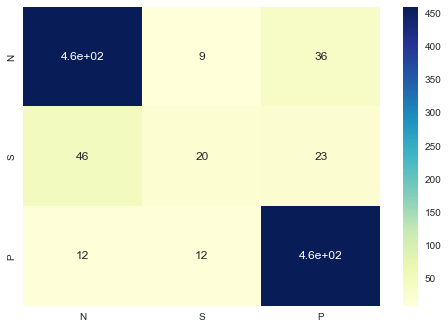

In [153]:
model_mlp = MLPClassifier(max_iter=300, random_state=1, solver='lbfgs')
model_mlp.fit(x_train,y_train)

print_confusion_matrix(model_mlp,x_test,y_test)

Precision:  85.39586752410104
Recall:  87.17472118959108
Accuracy:  87.17472118959108
F1 score:  85.82633773349923


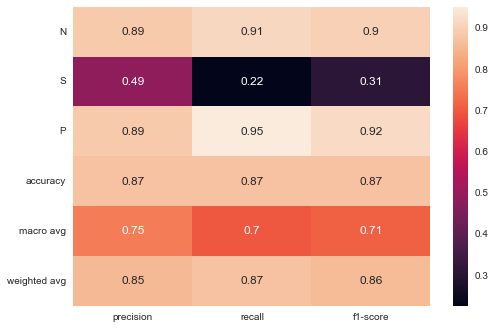

In [154]:
accuracy, precision, recall, f1, clf_report = print_metrics(model_mlp,x_test,y_test)
accuracy_models2.append(accuracy)
precision_models2.append(precision)
recall_models2.append(recall)
f1score_models2.append(f1)

In [155]:
print(clf_report)

{'N': {'precision': 0.8878143133462283, 'recall': 0.9107142857142857, 'f1-score': 0.8991185112634672, 'support': 504}, 'S': {'precision': 0.4878048780487805, 'recall': 0.2247191011235955, 'f1-score': 0.30769230769230765, 'support': 89}, 'P': {'precision': 0.8861003861003861, 'recall': 0.9503105590062112, 'f1-score': 0.9170829170829171, 'support': 483}, 'accuracy': 0.8717472118959108, 'macro avg': {'precision': 0.7539065258317983, 'recall': 0.6952479819480307, 'f1-score': 0.707964578679564, 'support': 1076}, 'weighted avg': {'precision': 0.8539586752410103, 'recall': 0.8717472118959108, 'f1-score': 0.8582633773349924, 'support': 1076}}


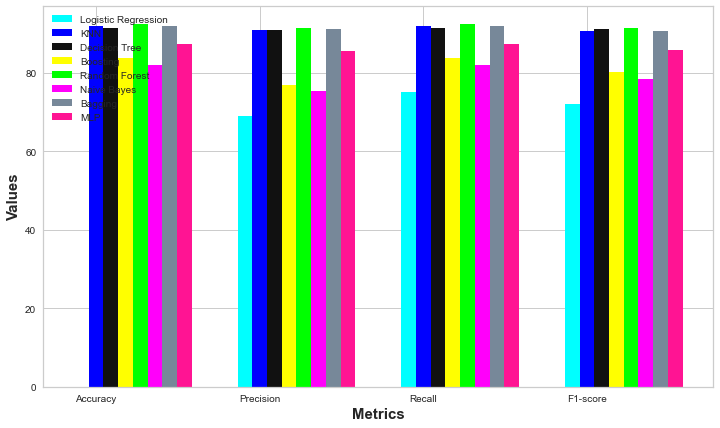

In [156]:
# set width of bar
barWidth = 0.09
fig = plt.subplots(figsize =(12,7))
 
# set height of bar
LR_arr = [[0],precision_models2[0],recall_models2[0],f1score_models2[0]]
KNN_arr = [accuracy_models2[1],precision_models2[1],recall_models2[1],f1score_models2[1]]
DT_arr = [accuracy_models2[2],precision_models2[2],recall_models2[2],f1score_models2[2]]
Boosting_arr= [accuracy_models2[3],precision_models2[3],recall_models2[3],f1score_models2[3]]
RF_arr = [accuracy_models2[4],precision_models2[4],recall_models2[4],f1score_models2[4]]
NB_arr = [accuracy_models2[5],precision_models2[5],recall_models2[5],f1score_models2[5]]
BAGGING_arr = [accuracy_models2[6],precision_models2[6],recall_models2[6],f1score_models2[6]]
MLP_arr = [accuracy_models2[7],precision_models2[7],recall_models2[7],f1score_models2[7]]

# Set position of bar on X axis
br1 = np.arange(len(LR_arr))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]

# Make the plot
plt.bar(br1, LR_arr, color ='#00FFFF', width = barWidth,label ='Logistic Regression')
plt.bar(br2, KNN_arr, color ='blue', width = barWidth, label ='KNN')
plt.bar(br3, DT_arr, color ='k', width = barWidth, label ='Decision Tree')
plt.bar(br4, Boosting_arr, color ='yellow', width = barWidth, label ='Boosting')
plt.bar(br5, RF_arr, color ='#00FF00', width = barWidth, label ='Random Forest')
plt.bar(br6, NB_arr, color ='#FF00FA', width = barWidth, label ='Naive Bayes')
plt.bar(br7, BAGGING_arr, color ='lightslategrey', width = barWidth, label ='Bagging')
plt.bar(br8, MLP_arr, color ='deeppink', width = barWidth, label ='MLP')

# Adding Xticks
plt.xlabel('Metrics', fontweight ='bold', fontsize = 15)
plt.ylabel('Values', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(LR_arr))],
        ['Accuracy', 'Precision', 'Recall', 'F1-score'])
 
plt.legend()
plt.show()